# #7 beta_regression analysis

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

msft = yf.download('MSFT', start='2010-01-01', end='2020-01-31')['Adj Close']
sp500 = yf.download('^GSPC', start='2010-01-01', end='2020-01-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
msft

Date
2010-01-04     23.572371
2010-01-05     23.579990
2010-01-06     23.435280
2010-01-07     23.191557
2010-01-08     23.351492
                 ...    
2020-01-24    159.698975
2020-01-27    157.028290
2020-01-28    160.105408
2020-01-29    162.601913
2020-01-30    167.188507
Name: Adj Close, Length: 2536, dtype: float64

In [3]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3708780000
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3831050000
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3531570000


In [4]:
sp500 = sp500['Adj Close']

In [5]:
df = pd.concat([msft, sp500], axis=1)
df

,Adj Close,Adj Close
Date,,
2010-01-04,23.572371,1132.989990
2010-01-05,23.579990,1136.520020
2010-01-06,23.435280,1137.140015
2010-01-07,23.191557,1141.689941
2010-01-08,23.351492,1144.979980
...,...,...
2020-01-24,159.698975,3295.469971
2020-01-27,157.028290,3243.629883
2020-01-28,160.105408,3276.239990


In [6]:
df.columns = ['MSFT', 'SP500']
df.dropna()
df

,MSFT,SP500
Date,,
2010-01-04,23.572371,1132.989990
2010-01-05,23.579990,1136.520020
2010-01-06,23.435280,1137.140015
2010-01-07,23.191557,1141.689941
2010-01-08,23.351492,1144.979980
...,...,...
2020-01-24,159.698975,3295.469971
2020-01-27,157.028290,3243.629883
2020-01-28,160.105408,3276.239990


In [7]:
ret = df.pct_change() * 100
ret.head()

,MSFT,SP500
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.032325,0.311568
2010-01-06,-0.613701,0.054552
2010-01-07,-1.039983,0.400120
2010-01-08,0.689626,0.288173


In [8]:
ret = ret.dropna()
ret.head()

,MSFT,SP500
Date,,
2010-01-05,0.032325,0.311568
2010-01-06,-0.613701,0.054552
2010-01-07,-1.039983,0.400120
2010-01-08,0.689626,0.288173
2010-01-11,-1.272018,0.174676


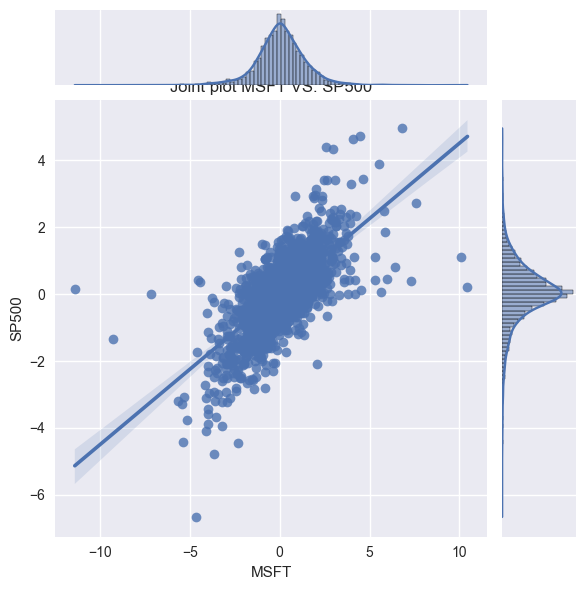

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='SP500', data=ret, kind='reg')
    # plt.xlabel('MSFT')
    # plt.ylabel('S&P500')
    plt.title('Joint plot MSFT VS. SP500')
    plt.show()

In [10]:
import statsmodels.api as smf

model = smf.formula.ols(formula="MSFT ~ SP500", data=ret).fit()

print(model.params)

Intercept    0.037954
SP500        1.070677
dtype: float64


In [11]:
import statsmodels.api as sm
model = sm.OLS(ret['MSFT'], sm.add_constant(ret['SP500'])).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:55:16   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.309   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.221
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This suggests that, according to our ,


In [12]:
from statsmodels.formula.api import ols
model2 = ols("MSFT ~ SP500", data=ret).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:55:16   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.309   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.221
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from statsmodels.formula.api import ols

daily_reg = ols(formula='MSFT ~ SP500', data=ret).fit()
daily_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2364.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:                -3668.0
No. Observations:                2535   AIC:                             7340.
Df Residuals:                    2533   BIC:                             7352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0380      0.020      1.855      0.064      -0.002       0.078
SP500          1.0707      0.022     48.624      0.000       1.027       1.114
==============================================================================
Omnibus:                      605.309   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30578.221
Skew:                           0.186   Prob(JB):                         0.00
Kurtosis:                      20.011   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
data = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Jointplot으로 두 변수 간의 관계 시각화
with plt.style.context('seaborn'):
    sns.jointplot(x='MSFT', y='^GSPC', data=data, kind='reg')
    plt.xlabel('MSFT')
    plt.ylabel('^GSPC')
    plt.title('Scatter plot of MSFT and ^GSPC')
    plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(data['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = data['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())

In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 다운로드
start_date = '2010-01-01'
end_date = '2020-01-31'
data = yf.download(['MSFT', '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Jointplot으로 두 변수 간의 관계 시각화
sns.set(style='whitegrid')  # 스타일 설정
sns.jointplot(x='MSFT', y='^GSPC', data=data, kind='reg')
plt.xlabel('MSFT')
plt.ylabel('^GSPC')
plt.title('MSFT와 ^GSPC의 산점도')
plt.show()

# CAPM 모델을 위한 선형 회귀
X = sm.add_constant(data['^GSPC'])  # 상수항을 추가한 설명 변수 X
y = data['MSFT']  # 종속 변수 y

model = sm.OLS(y, X)  # OLS 모델 생성
results = model.fit()  # 모델 피팅

# 회귀 결과 출력
print(results.summary())


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression

# symbols = [stock, market]
# start date for historical prices
symbols = ['AXP', 'SPY']
data = yf.download(symbols, '2020-2-22')['Adj Close']

# Convert historical stock prices to daily percent change
price_change = data.pct_change()

# Deletes row one containing the NaN
df = price_change.drop(price_change.index[0])

# Create arrays for x and y variables in the regression model
# Set up the model and define the type of regression
x = np.array(df['AXP']).reshape((-1,1))
y = np.array(df['SPY'])
model = LinearRegression().fit(x, y)

print('Beta = ', model.coef_)